In [105]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("car_prices.csv")

# Step 3: Basic info about the dataset
print("Shape of dataset:", df.shape)
print("\nColumns in dataset:", df.columns.tolist())

# Step 4: Preview first 5 rows
df.head()

Shape of dataset: (558837, 16)

Columns in dataset: ['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate']


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [107]:
# Assuming manufacture year column is named 'year'
df_2015 = df[df["year"] == 2015].copy()

print("2015 model cars:", df_2015.shape[0])
df_2015.head()

2015 model cars: 9437


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
11,2015,Kia,Optima,LX,Sedan,automatic,5xxgm4a73fg353538,ca,48.0,2034.0,red,tan,kia motors finance,15150.0,17700.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)


In [109]:
def categorize(p):
    if p < 20000:
        return "Budget"
    elif p < 40000:
        return "Mainstream"
    else:
        return "Premium"

df_2015["category"] = df_2015["sellingprice"].apply(categorize)

In [111]:
# Aggregate avg price & sales volume

agg_2015 = (
    df_2015.groupby("category")
           .agg(avg_price=("sellingprice", "mean"),
                sales_volume=("sellingprice", "count"))
           .reset_index()
)

# Order categories for clean plotting
cat_order = ["Budget", "Mainstream", "Premium"]
agg_2015["category"] = pd.Categorical(agg_2015["category"], cat_order, ordered=True)
agg_2015 = agg_2015.sort_values("category")
agg_2015

,category,avg_price,sales_volume
0,Budget,14904.058856,3602
1,Mainstream,26880.137326,4442
2,Premium,51425.269203,1393


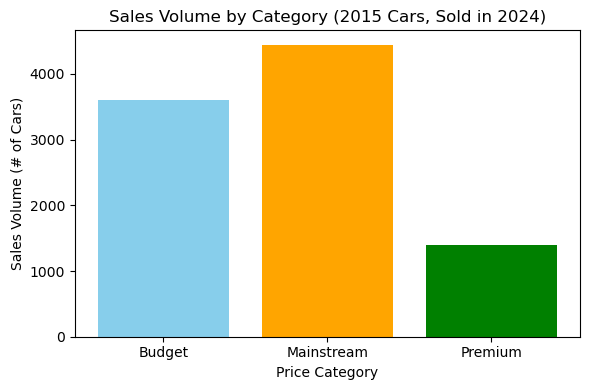

In [113]:
plt.figure(figsize=(6,4))
plt.bar(agg_2015["category"], agg_2015["sales_volume"], color=["skyblue","orange","green"])
plt.title("Sales Volume by Category (2015 Cars, Sold in 2024)")
plt.xlabel("Price Category")
plt.ylabel("Sales Volume (# of Cars)")
plt.tight_layout()
plt.show()

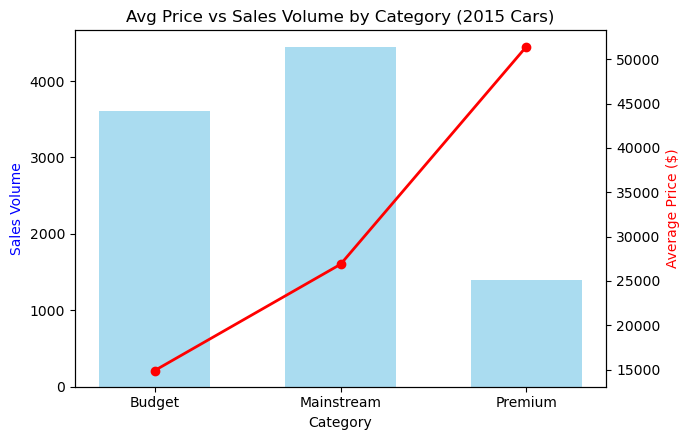

In [115]:
import numpy as np

fig, ax1 = plt.subplots(figsize=(7,4.5))

x = np.arange(len(agg_2015))

# Sales volume as bars
ax1.bar(x, agg_2015["sales_volume"], width=0.6, color="skyblue", alpha=0.7)
ax1.set_xlabel("Category")
ax1.set_ylabel("Sales Volume", color="blue")
ax1.set_xticks(x)
ax1.set_xticklabels(agg_2015["category"])

# Avg price as line
ax2 = ax1.twinx()
ax2.plot(x, agg_2015["avg_price"], marker="o", linewidth=2, color="red")
ax2.set_ylabel("Average Price ($)", color="red")

plt.title("Avg Price vs Sales Volume by Category (2015 Cars)")
fig.tight_layout()
plt.show()

In [117]:
print(df.columns.tolist())

['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate']


In [119]:
# Normalize make column to lowercase
df["make"] = df["make"].str.lower()

# Filter for 2015
df_2015 = df[df["year"] == 2015]

# Drop NaN before checking unique values
unique_makes_2015 = df_2015["make"].dropna().unique()

print("Number of unique makes (2015):", len(unique_makes_2015))
print(sorted(unique_makes_2015))

Number of unique makes (2015): 33
['acura', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'fiat', 'ford', 'gmc', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz', 'mini', 'mitsubishi', 'nissan', 'porsche', 'ram', 'scion', 'smart', 'subaru', 'toyota', 'volkswagen', 'volvo']


In [45]:
# Get unique make-model pairs for 2015
unique_models = df_2015[["make", "model"]].dropna().drop_duplicates()

# Display all rows without truncation
pd.set_option("display.max_rows", None)

print("Total unique make-model (2015):", unique_models.shape[0])
display(unique_models.sort_values(["make", "model"]))

Total unique make-model (2015): 209


,make,model
475044,acura,ILX
445605,acura,MDX
103565,acura,RDX
547702,acura,TLX
23,audi,A3
425809,audi,A4
439215,audi,A6
553662,audi,A8
475043,audi,Q3
424626,audi,Q5


In [47]:
unique_models.to_csv("unique_make_models_2015.csv", index=False)

In [121]:
import pandas as pd, re

df = pd.read_csv("unique_make_models_2015.csv")
for col in ["make","model"]:
    df[col] = df[col].astype(str).str.strip().str.lower()

luxury_makes = {"audi","bmw","cadillac","jaguar","land rover","lexus","lincoln","mercedes-benz","porsche","volvo"}
mid_makes = {"acura","buick","infiniti","kia","mini","volkswagen"}
entry_makes = {"chevrolet","chrysler","dodge","fiat","ford","gmc","honda","hyundai","jeep","mazda","mitsubishi","nissan","ram","scion","smart","subaru","toyota"}

def baseline_tier(make):
    if make in luxury_makes: return "Luxury"
    if make in mid_makes:    return "Mid Level"
    if make in entry_makes:  return "Entry Level"
    return "Other"

overrides = {
    ("toyota", r"(land\s*cruiser|sequoia)"): "Luxury",
    ("toyota", r"(avalon|highlander|4runner|sienna|venza|tacoma|tundra|camry)"): "Mid Level",
    ("toyota", r"(corolla|yaris|prius|matrix)"): "Entry Level",
    ("honda", r"(pilot|odyssey|passport|ridgeline)"): "Mid Level",
    ("honda", r"(civic|fit)"): "Entry Level",
    ("honda", r"(accord|cr-v|crv|hr-v|hrv)"): "Mid Level",
    ("acura", r"(rlx|mdx|rdx|tlx)"): "Mid Level",
    ("infiniti", r"(q50|q60|q70|qx60|qx70|qx80)"): "Mid Level",
    ("nissan", r"(armada|pathfinder|maxima|murano|xterra|frontier|rogue|quest)"): "Mid Level",
    ("nissan", r"(versa|sentra|cube|leaf|juke)"): "Entry Level",
    ("hyundai", r"(genesis|equus|palisade|santa fe|sonata|tucson)"): "Mid Level",
    ("hyundai", r"(accent|elantra|veloster|ioniq)"): "Entry Level",
    ("kia", r"(k900)"): "Mid Level",
    ("kia", r"(optima|sorento|sportage|sedona|cadenza|soul)"): "Mid Level",
    ("kia", r"(rio|forte)"): "Entry Level",
    ("ford", r"(f[- ]?150|explorer|edge|expedition|flex|taurus)"): "Mid Level",
    ("ford", r"(focus|fiesta|fusion|escape|c[- ]?max)"): "Entry Level",
    ("chevrolet", r"(suburban|tahoe|traverse|silverado)"): "Mid Level",
    ("chevrolet", r"(malibu|cruze|sonic|spark|equinox|impala|trax)"): "Entry Level",
    ("gmc", r"(yukon|acadia|sierra|terrain)"): "Mid Level",
    ("buick", r"(enclave|lacrosse|regal|verano|encore)"): "Mid Level",
    ("chrysler", r"(300|town.*country|pacifica)"): "Mid Level",
    ("dodge", r"(durango|charger|challenger|journey|grand caravan|ram)"): "Mid Level",
    ("ram", r"(1500|2500|3500|promaster)"): "Mid Level",
    ("mazda", r"(cx[- ]?5|cx[- ]?9|cx[- ]?3|mazda6)"): "Mid Level",
    ("mazda", r"(mazda2|mazda3)"): "Entry Level",
    ("subaru", r"(outback|forester|ascent|legacy)"): "Mid Level",
    ("subaru", r"(impreza|brz)"): "Entry Level",
    ("volkswagen", r"(touareg|atlas|phaeton)"): "Mid Level",
    ("volkswagen", r"(golf|jetta|passat|tiguan|beetle)"): "Mid Level",
    ("bmw", r"(7\s?series|750|760)"): "Luxury",
    ("bmw", r"(3\s?series|320|328|330)"): "Mid Level",
    ("bmw", r"(5\s?series|528|535|540|x5|x6)"): "Luxury",
    ("audi", r"(a8|q7)"): "Luxury",
    ("audi", r"(a3|a4|q3)"): "Mid Level",
    ("audi", r"(a6|q5)"): "Luxury",
    ("mercedes-benz", r"(s[- ]?class|gl[- ]?class|g[- ]?class)"): "Luxury",
    ("mercedes-benz", r"(c[- ]?class|cla|gla)"): "Mid Level",
    ("mercedes-benz", r"(e[- ]?class|ml|glc|gle)"): "Luxury",
    ("lexus", r"(ls|lx|gx)"): "Luxury",
    ("lexus", r"(is|ct)"): "Mid Level",
    ("lexus", r"(es|rx|nx|gs)"): "Luxury",
    ("cadillac", r"(ats)"): "Mid Level",
    ("cadillac", r"(cts|xts|escalade|srx)"): "Luxury",
    ("volvo", r"(s60|v60|xc60)"): "Mid Level",
    ("volvo", r"(s80|xc90)"): "Luxury",
    ("jeep", r"(grand cherokee|wrangler|patriot|compass|cherokee)"): "Mid Level",
    ("mitsubishi", r"(outlander|lancer|mirage)"): "Entry Level",
    ("fiat", r"(500|500l|500x)"): "Entry Level",
    ("smart", r"(fortwo)"): "Entry Level",
    ("lincoln", r"(mkz|mks|mkt|mkc|navigator)"): "Luxury",
    ("porsche", r"(.*)"): "Luxury",
    ("jaguar", r"(.*)"): "Luxury",
    ("land rover", r"(.*)"): "Luxury",
}

def apply_overrides(make, model, current):
    for (mk, patt), tier in overrides.items():
        if make == mk and re.search(patt, model or "", flags=re.IGNORECASE):
            return tier
    return current

df["baseline_tier"] = df["make"].apply(baseline_tier)
df["tier"] = df.apply(lambda r: apply_overrides(r["make"], r["model"], r["baseline_tier"]), axis=1)

out = df[["make","model","tier"]].sort_values(["tier","make","model"])
out.to_csv("make_model_tiers_2015.csv", index=False)
print(out["tier"].value_counts())
out.head()

tier
Mid Level      108
Entry Level     55
Luxury          46
Name: count, dtype: int64


,make,model,tier
34,chevrolet,camaro,Entry Level
19,chevrolet,capt,Entry Level
161,chevrolet,colorado,Entry Level
71,chevrolet,corvette,Entry Level
102,chevrolet,cruze,Entry Level


In [123]:
# Full dataset with prices
cars = pd.read_csv("car_prices.csv")

# Normalize to lowercase for join
cars["make"] = cars["make"].astype(str).str.lower()
cars["model"] = cars["model"].astype(str).str.lower()

# The make+model → tier mapping you created earlier
mapping = pd.read_csv("make_model_tiers_2015.csv")
mapping["make"] = mapping["make"].astype(str).str.lower()
mapping["model"] = mapping["model"].astype(str).str.lower()

# Merge tiers into full dataset
cars = cars.merge(mapping[["make","model","tier"]], on=["make","model"], how="left")

# Pick the right year column (handles 'year' vs 'model_year', etc.)
if "year" in cars.columns:
    year_col = "year"
else:
    year_col = [c for c in cars.columns if "year" in c.lower()][0]

# Basic sanity checks
print("Columns:", cars.columns.tolist())
print("Tier counts:", cars["tier"].value_counts(dropna=False).to_dict())
print("Year col:", year_col)

Columns: ['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate', 'tier']
Tier counts: {'Mid Level': 217839, nan: 158678, 'Entry Level': 152221, 'Luxury': 30099}
Year col: year


In [125]:
cars_2015 = cars[cars[year_col] == 2015].copy()

agg_2015 = (
    cars_2015.groupby("tier", dropna=False)
             .agg(avg_price=("sellingprice", "mean"),
                  sales_volume=("sellingprice", "count"))
             .reset_index()
)

# Order tiers for plotting
order = ["Entry Level", "Mid Level", "Luxury"]
agg_2015["tier"] = pd.Categorical(agg_2015["tier"], order, ordered=True)
agg_2015 = agg_2015.sort_values("tier")

agg_2015

,tier,avg_price,sales_volume
0,Entry Level,18240.246018,2825
2,Mid Level,27021.442941,5617
1,Luxury,47463.726790,754
3,NaN,23342.738589,241


In [127]:
# --- Safety: check how many 2015 rows are missing a tier ---
missing_tier = cars_2015["tier"].isna().sum()
print(f"2015 rows missing tier: {missing_tier}")

# Option A (recommended): drop rows without a tier
cars_2015_clean = cars_2015.dropna(subset=["tier"]).copy()


2015 rows missing tier: 241


In [129]:
# --- Aggregate after cleaning ---
agg_2015 = (
    cars_2015_clean.groupby("tier")
                   .agg(avg_price=("sellingprice", "mean"),
                        sales_volume=("sellingprice", "count"))
                   .reset_index()
)

# Ensure tier is a clean categorical for plotting
order = ["Entry Level", "Mid Level", "Luxury", "Uncategorized"]
agg_2015["tier"] = (agg_2015["tier"]
                    .astype("string")
                    .fillna("Uncategorized"))
agg_2015["tier"] = pd.Categorical(agg_2015["tier"],
                                  [x for x in order if x in agg_2015["tier"].unique()],
                                  ordered=True)
agg_2015 = agg_2015.sort_values("tier")
agg_2015

,tier,avg_price,sales_volume
0,Entry Level,18240.246018,2825
2,Mid Level,27021.442941,5617
1,Luxury,47463.726790,754


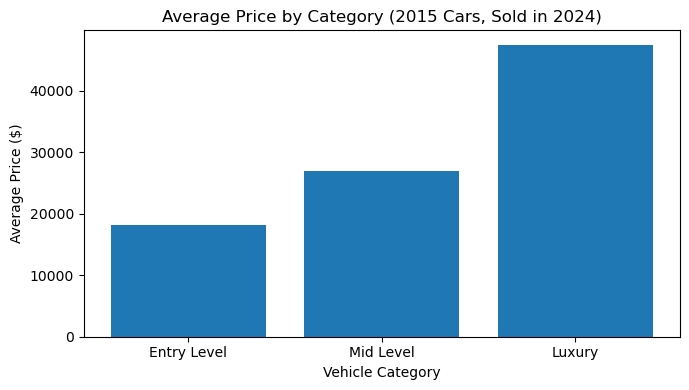

In [133]:
# Average Price (vs) Category for all the cars sold in 2015
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,4))
plt.bar(agg_2015["tier"].astype(str), agg_2015["avg_price"])
plt.title("Average Price by Category (2015 Cars, Sold in 2024)")
plt.xlabel("Vehicle Category")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()

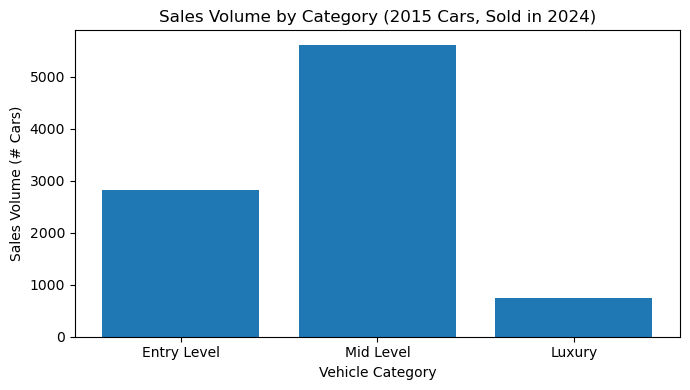

In [135]:
# Total volume of cars sold (vs) Category for all the cars sold in 2015
plt.figure(figsize=(7,4))
plt.bar(agg_2015["tier"].astype(str), agg_2015["sales_volume"])
plt.title("Sales Volume by Category (2015 Cars, Sold in 2024)")
plt.xlabel("Vehicle Category")
plt.ylabel("Sales Volume (# Cars)")
plt.tight_layout()
plt.show()

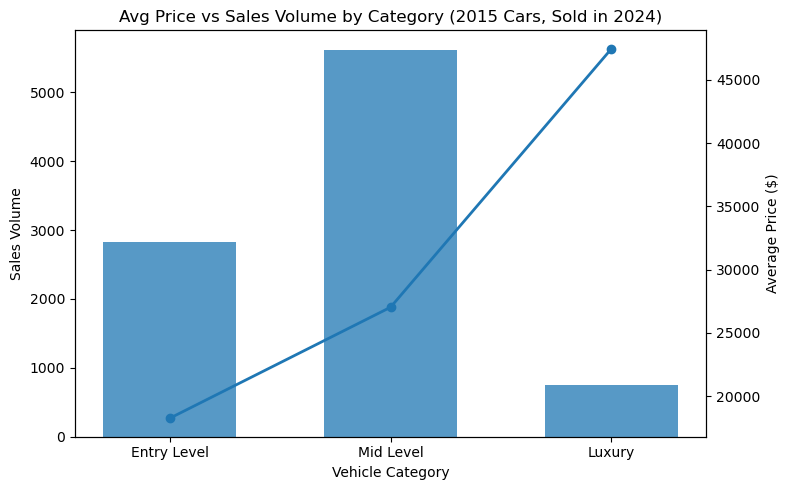

In [137]:
# Average Price (vs) Sales Volume (vs) Category for all the cars sold in 2015
x = np.arange(len(agg_2015))
labels = agg_2015["tier"].astype(str).tolist()

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.bar(x, agg_2015["sales_volume"], width=0.6, alpha=0.75)
ax1.set_xlabel("Vehicle Category")
ax1.set_ylabel("Sales Volume")
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

ax2 = ax1.twinx()
ax2.plot(x, agg_2015["avg_price"], marker="o", linewidth=2)
ax2.set_ylabel("Average Price ($)")

plt.title("Avg Price vs Sales Volume by Category (2015 Cars, Sold in 2024)")
fig.tight_layout()
plt.show()

In [139]:
# Adding back all the unmapped cars back to the data frame
unmapped = (cars_2015[cars_2015["tier"].isna()]
            .loc[:, ["make","model"]]
            .drop_duplicates()
            .sort_values(["make","model"]))
unmapped.head(20), unmapped.shape

(        make model
 70510   audi   nan
 414215   bmw   nan
 151766   nan   nan,
 (3, 2))

In [151]:
# Inspect once (optional)
print(cars["seller"].head(10))

# Robust boolean from 'seller' text
cars["is_dealer"] = (
    cars["seller"]
        .astype(str).str.lower()
        .str.contains(r"\bdealer\b|\bdealership\b|carmax|autonation")
)

0                              kia motors america  inc
1                              kia motors america  inc
2               financial services remarketing (lease)
3                              volvo na rep/world omni
4               financial services remarketing (lease)
5    enterprise vehicle exchange / tra / rental / t...
6                                the hertz corporation
7    enterprise vehicle exchange / tra / rental / t...
8                                   audi mission viejo
9                                   d/m auto sales inc
Name: seller, dtype: object


In [223]:
# Load full dataset
cars = pd.read_csv("car_prices.csv")

# Normalize for merging
cars["make"] = cars["make"].astype(str).str.lower()
cars["model"] = cars["model"].astype(str).str.lower()

# Merge in tier mapping
mapping = pd.read_csv("make_model_tiers_2015.csv")
mapping["make"] = mapping["make"].astype(str).str.lower()
mapping["model"] = mapping["model"].astype(str).str.lower()

cars = cars.merge(mapping[["make","model","tier"]], on=["make","model"], how="left")

print(cars.columns.tolist())

['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate', 'tier']


In [229]:
# Filter 2015 sellers
cars_2015 = cars[cars["year"] == 2015].copy()

# Unique sellers only
unique_sellers = cars_2015[["seller"]].dropna().drop_duplicates().sort_values("seller")

# Save to CSV
unique_sellers.to_csv("unique_sellers_2015.csv", index=False)
print("Exported unique sellers to unique_sellers_2015.csv")

Exported unique sellers to unique_sellers_2015.csv


In [249]:
def classify_seller(seller):
    s = str(seller).lower()

    # Non-dealers: banks, finance, leasing trusts, rental companies
    if any(x in s for x in [
        "financial", "bank", "trust", "credit union", "fcu", 
        "leasing corp", "lease trust", "rental", "rent a car", 
        "hertz", "enterprise", "avis", "budget", "alamo", "national car"
    ]):
        return False
    
    # Dealers: auto sales, motors, franchises, OEM brand dealers
    if any(x in s for x in [
        "auto", "motors", "dealer", "dealers", "dealership",
        "toyota", "ford", "honda", "nissan", "chevrolet", "cadillac",
        "bmw", "mercedes", "hyundai", "kia", "chrysler", "dodge",
        "jeep", "ram", "lexus", "volvo", "mazda", "acura", "audi",
        "lincoln", "porsche", "land rover", "jaguar"
    ]):
        return True
    
    # Default = non-dealer
    return False

# Apply to cars dataframe
cars["is_dealer"] = cars["seller"].apply(classify_seller)

# Quick check
print(cars["is_dealer"].value_counts())
print(cars[["seller","is_dealer"]].head(20))
# print(cars[["seller","is_dealer"]])

is_dealer
False    309276
True     249561
Name: count, dtype: int64
                                               seller  is_dealer
0                             kia motors america  inc       True
1                             kia motors america  inc       True
2              financial services remarketing (lease)      False
3                             volvo na rep/world omni       True
4              financial services remarketing (lease)      False
5   enterprise vehicle exchange / tra / rental / t...      False
6                               the hertz corporation      False
7   enterprise vehicle exchange / tra / rental / t...      False
8                                  audi mission viejo       True
9                                  d/m auto sales inc       True
10                                  desert auto trade       True
11                                 kia motors finance       True
12  enterprise vehicle exchange / tra / rental / t...      False
13                    

In [247]:
cars_2015 = cars[cars["year"] == 2015]
dealer_counts_2015 = cars_2015["is_dealer"].value_counts().reset_index()
dealer_counts_2015.columns = ["is_dealer", "count"]
dealer_counts_2015["percentage"] = (dealer_counts_2015["count"] / dealer_counts_2015["count"].sum() * 100).round(2)

print(dealer_counts_2015)

   is_dealer  count  percentage
0      False   5600       59.34
1       True   3837       40.66


In [251]:
cars_2015 = cars[(cars["year"] == 2015) & (cars["is_dealer"].notna())].copy()
print(cars_2015.shape)

(9437, 18)


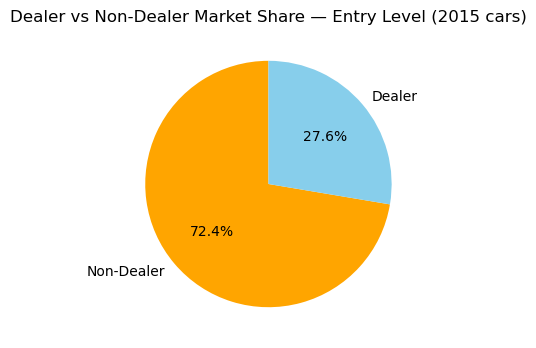

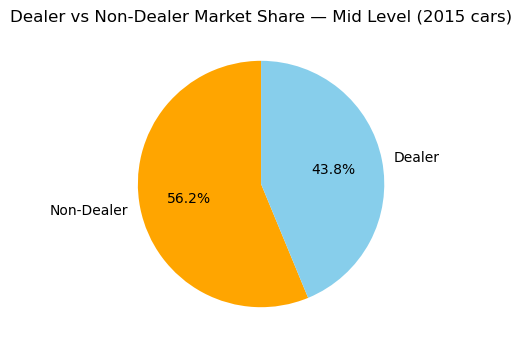

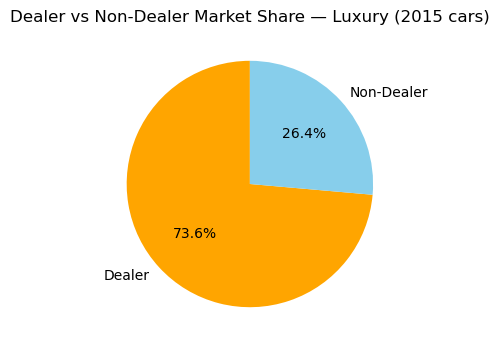

In [253]:
import matplotlib.pyplot as plt

tiers = ["Entry Level", "Mid Level", "Luxury"]

for t in tiers:
    # Filter for 2015 + specific tier
    subset = cars[(cars["tier"] == t) & (cars["year"] == 2015)]
    counts = subset["is_dealer"].value_counts()

    plt.figure(figsize=(4,4))
    plt.pie(counts,
            labels=counts.index.map({True: "Dealer", False: "Non-Dealer"}),
            autopct='%1.1f%%',
            colors=["orange","skyblue"],
            startangle=90)
    plt.title(f"Dealer vs Non-Dealer Market Share — {t} (2015 cars)")
    plt.show()

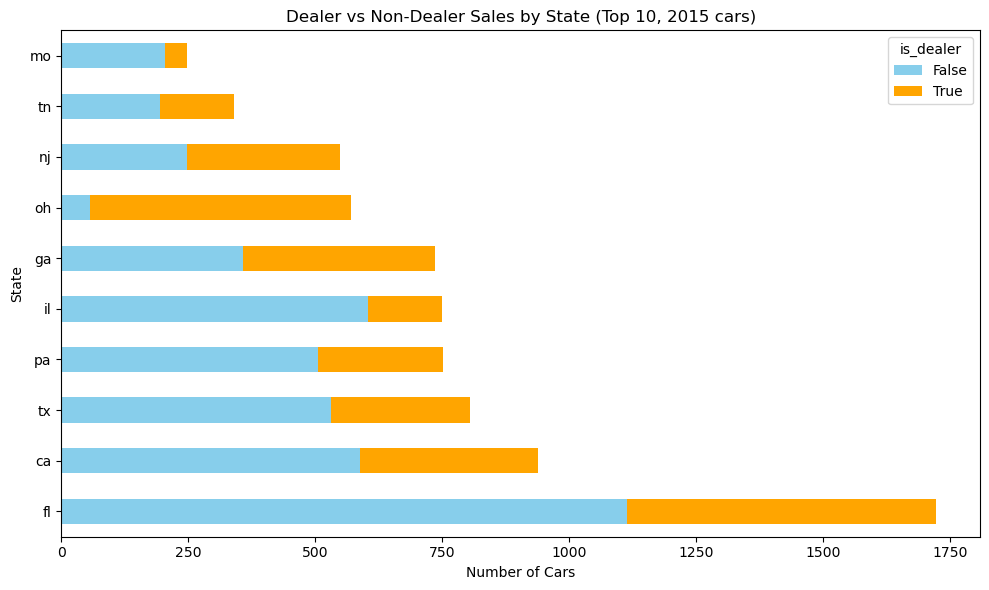

In [255]:
import matplotlib.pyplot as plt

# --- filter only 2015 cars ---
cars_2015 = cars[cars["year"] == 2015]

# --- count dealer vs non-dealer per state ---
state_counts = cars_2015.groupby(["state","is_dealer"]).size().unstack(fill_value=0)

# --- top 10 states by total volume ---
top_states = state_counts.sum(axis=1).sort_values(ascending=False).head(10)

# --- plot stacked horizontal bar ---
state_counts.loc[top_states.index].plot(
    kind="barh", stacked=True, figsize=(10,6), color=["skyblue","orange"]
)

plt.title("Dealer vs Non-Dealer Sales by State (Top 10, 2015 cars)")
plt.xlabel("Number of Cars")
plt.ylabel("State")
plt.tight_layout()
plt.show()

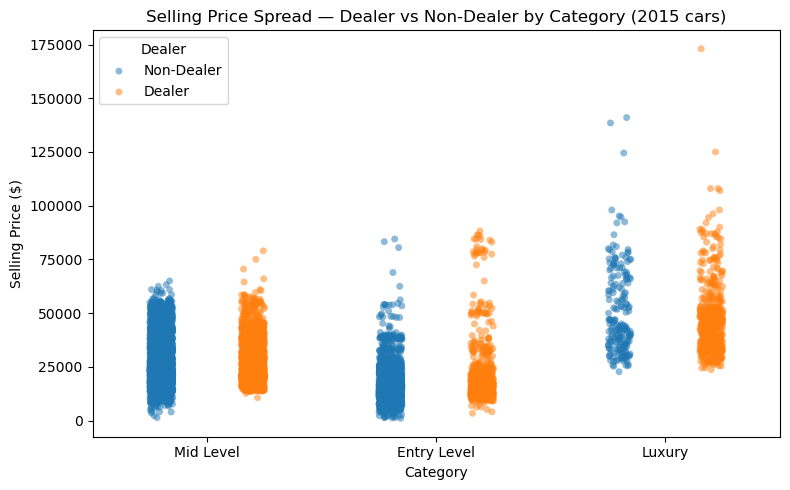

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for 2015 cars only
cars_2015 = cars[cars["year"] == 2015]

plt.figure(figsize=(8,5))
sns.stripplot(
    data=cars_2015,
    x="tier", 
    y="sellingprice", 
    hue="is_dealer",
    dodge=True,
    alpha=0.5,
    jitter=True
)
plt.title("Selling Price Spread — Dealer vs Non-Dealer by Category (2015 cars)")
plt.xlabel("Category")
plt.ylabel("Selling Price ($)")
plt.legend(title="Dealer", labels=["Non-Dealer","Dealer"])
plt.tight_layout()
plt.show()

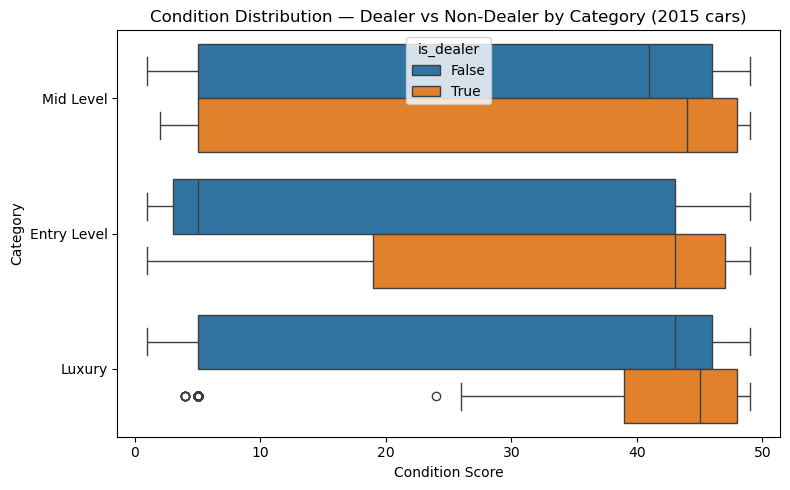

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for 2015
cars_2015 = cars[cars["year"] == 2015]

plt.figure(figsize=(8,5))
sns.boxplot(
    data=cars_2015,
    y="tier", 
    x="condition", 
    hue="is_dealer", 
    orient="h"
)
plt.title("Condition Distribution — Dealer vs Non-Dealer by Category (2015 cars)")
plt.xlabel("Condition Score")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

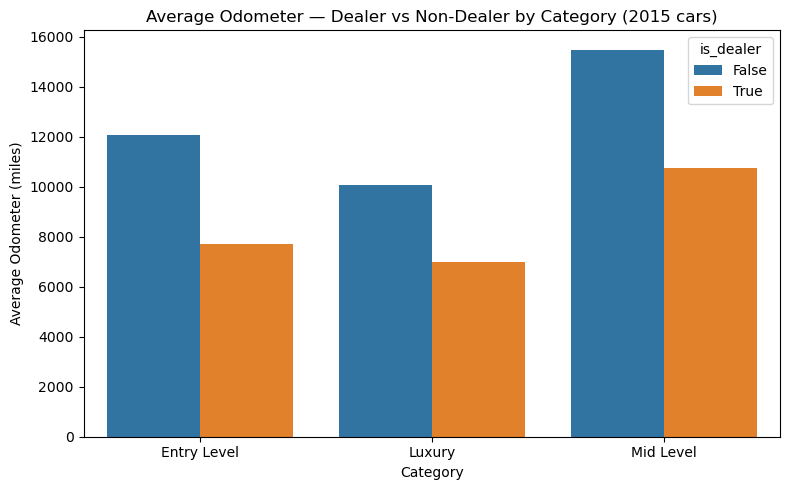

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for 2015 cars
cars_2015 = cars[cars["year"] == 2015]

# Aggregate average odometer
odo_avg = cars_2015.groupby(["tier","is_dealer"])["odometer"].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=odo_avg, x="tier", y="odometer", hue="is_dealer")
plt.title("Average Odometer — Dealer vs Non-Dealer by Category (2015 cars)")
plt.xlabel("Category")
plt.ylabel("Average Odometer (miles)")
plt.tight_layout()
plt.show()

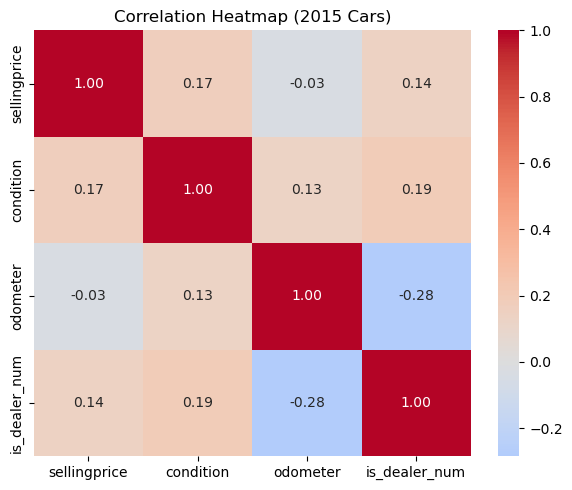

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for 2015 cars
cars_2015 = cars[cars["year"] == 2015].copy()

# Convert dealer flag to numeric for correlation
cars_2015["is_dealer_num"] = cars_2015["is_dealer"].astype(int)

# Select relevant numeric columns
corr_cols = ["sellingprice", "condition", "odometer", "is_dealer_num"]
corr_matrix = cars_2015[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap (2015 Cars)")
plt.tight_layout()
plt.show()